# Question 4

### (a)

In [5]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

wine = pd.read_csv("winequality-red.csv", delimiter = ";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### (b)

In [6]:
X = np.array(wine.iloc[:, :-1])
y = np.array(wine.iloc[:, 11])


X_train, X_sub, y_train, y_sub = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_sub, y_sub, test_size = 15/25, random_state = 42)

### (c)

The closed-form solution that minimizes the sum-of-squares error is $$\beta = (X^TX)^{-1} X^T y.$$

In [8]:
#SSE function
def SSE(X, y):
    beta = LA.inv(X.T @ X) @ X.T @ y
    return beta


In [9]:
#Getting Beta values
beta = SSE(X_train, y_train)
print(beta)

[ 3.19457033e-03 -1.02208859e+00 -1.35187029e-01  1.34793781e-04
 -1.78090495e+00  5.19502700e-03 -3.70824267e-03  4.20796084e+00
 -4.42831022e-01  7.92848115e-01  3.04980738e-01]


### (d)

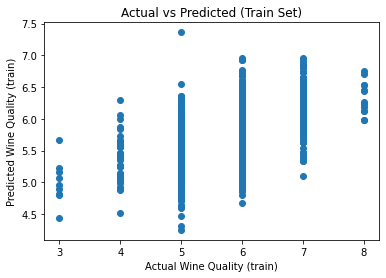

In [45]:
y_train_pred = X_train @ beta

plt.scatter(y_train, y_train_pred)
plt.ylabel("Predicted Wine Quality (train)")
plt.xlabel("Actual Wine Quality (train)")
plt.title("Actual vs Predicted (Train Set)")
plt.show()

The plot shows that the model moderately captures the relationship between features and wine quality, but the predictions have noticeable variance around the actual values, suggesting that precision isn't perfect. The predictions seem to be more accurate around wines with moderate wine quality, i.e. 6 or 7, compared with wines with poor or very good quality, i.e. 3 or 8. 

### (e)

In [52]:
def mse(X, y, beta):
    return np.sum((X @ beta - y) ** 2) / 2

def rmse(X, y, beta):
    return np.sqrt(2 * mse(X, y, beta) / len(X))

print(f"Root MSE (train): {rmse(X_train, y_train, beta)}")
print(f"Root MSE (test): {rmse(X_test, y_test, beta)}")

Root MSE (train): 0.6539565424645603
Root MSE (test): 0.6148418450930127


### (f)

In [54]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### (g)

In [62]:
def LMS(X, y, iter=1000000, step=0.00005):
    w = np.random.uniform(-10, 10, size=X.shape[1])
    for _ in range(iter):
        idx = np.random.randint(0, X.shape[0])
        error = y[idx] - np.dot(w, X[idx])
        w += step * error * X[idx]
    return w

In [63]:
iteration = 1000000
stepsize = 0.00005
theta = LMS(X_train, y_train, iteration, stepsize)
print(theta)

[-0.05031171  0.89095122  0.81986402 -0.03385028 -1.27373861  0.01281325
 -0.00377762  2.88647765 -0.69605969  1.96234921  0.36812477]


### (h)

In [64]:
def mse_LMS(X, y, theta):
    return np.sum((X @ theta - y) ** 2) / 2

def rootmse_LMS(X, y, theta):
    return np.sqrt(2 * mse_LMS(X, y, theta) / len(X))

step_sizes = [0.00001, 0.00005, 0.0001, 0.0005]
best_rmse = float("inf")
best_eta = None
best_theta = None

for eta in step_sizes:
    theta_temp = LMS(X_train, y_train, iter=1500000, step=eta)
    val_rmse = rmse_LMS(X_val, y_val, theta_temp)
    print(f"Step size {eta:.5f} → Validation RMSE: {val_rmse:.4f}")
    
    if val_rmse < best_rmse:
        best_rmse = val_rmse
        best_eta = eta
        best_theta = theta_temp

print(f"\nBest step size: {best_eta}, with validation RMSE: {best_rmse:.4f}")

Step size 0.00001 → Validation RMSE: 1.0791
Step size 0.00005 → Validation RMSE: 0.7726
Step size 0.00010 → Validation RMSE: 0.8300


C:\Users\ryche\AppData\Local\Temp\ipykernel_5456\1425682095.py:6: RuntimeWarning: invalid value encountered in add
  w += step * error * X[idx]


Step size 0.00050 → Validation RMSE: nan

Best step size: 5e-05, with validation RMSE: 0.7726


### (i)

In [65]:
X_final_train = np.vstack((X_train, X_val))
y_final_train = np.hstack((y_train, y_val))

theta_final = LMS(X_final_train, y_final_train, iter=1500000, step=best_eta)

### (j)

In [66]:
print("Final LMS RMSE (train):", rootmse_LMS(X_final_train, y_final_train, theta_final))
print("Final LMS RMSE (test):", rootmse_LMS(X_test, y_test, theta_final))

Final LMS RMSE (train): 0.6728278889428423
Final LMS RMSE (test): 0.6071001898345881
